!pip install xbbg

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import xbbg as xb
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [153]:
pd.reset_option("^display")

# PART 1 - Intraday Realized Volatility

## Retrieve_intraday_data from Bloomberg

In [3]:
# Possible retreivable data
datas_to_retreive = {'USD_Curve': ['usd_2y', 'usd_5y', 'usd_10y'] , 
                     'GBP_Curve': ['gbp_2y', 'gbp_5y', 'gbp_10y'] , 
                     'EUR_Curve': ['eur_2y', 'eur_5y', 'eur_10y']
                    } ## These must be the actual tickers from BBG

### Defining the function that retreives the data

In [4]:
def retrieve_intraday_bar_data(start_datetime, end_datetime, curve, interval=30):
    # Select the tickers based on the specified curve
    securities = datas_to_retreive[curve]

    # Create an empty dictionary to store the dataframes
    result = {}

    # Retrieve intraday bar data for each security
    for security in securities:
        # Retrieve the intraday bar data using xbbg
        data = xbbg.intradayBar(security, start_datetime, end_datetime, event_type='TRADE', interval=interval)

        # Extract the necessary columns: datetime, ticker, last price
        df = data[['datetime', 'ticker', 'last_price']]

        # Add the dataframe to the result dictionary
        result[security] = df

    return result

The `result` object returned by the retrieve_intraday_bar_data function is a dictionary where each key represents a security in the specified curve, and the corresponding value is a DataFrame containing the intraday bar data for that security.

result = {
    'security_1': DataFrame_1,
    'security_2': DataFrame_2,
    ...
}

To access the intraday bar data for a specific security:
usd_2y_df = result['usd_2y']

#### Retriving the Data

In [5]:
start_datetime = pd.Timestamp('2023-07-03 09:00:00')
end_datetime = pd.Timestamp('2023-07-03 16:00:00')
curve = 'USD_Curve'

result = retrieve_intraday_bar_data(start_datetime, end_datetime, curve)

# Access the separate dataframes for each security
usd_2y_df = result['usd_2y']
usd_5y_df = result['usd_5y']
usd_10y_df = result['usd_10y']

# Display the dataframes
print(usd_2y_df.head())
print(usd_5y_df.head())
print(usd_10y_df.head())

# OR display each element (dataframe) of the result dataframe

# Access the individual DataFrames for each security
for security, df in result.items():
    print(f"Intraday Data for {security}:")
    display(df)
    print("\n\n")

NameError: name 'xbbg' is not defined

##### Simulating plausible data to work with (here, for GBP only)

In [30]:
# Define the start and end datetimes
start_datetime = pd.Timestamp('2023-07-01 09:00:00')
end_datetime = pd.Timestamp('2023-07-03 16:00:00')

# Define the securities for the GBP curve
tenors = ['gbp_2y', 'gbp_5y', 'gbp_10y']

# Generate plausible data for each security
result = {}
for tenor in tenors:
    # Generate timestamps at 30-second intervals
    timestamps = pd.date_range(start=start_datetime, end=end_datetime, freq='30S')

    # Generate random last prices for each timestamp
    last_prices = np.random.uniform(1, 10, size=len(timestamps))

    # Create the DataFrame for the security
    df = pd.DataFrame({'datetime': timestamps, 'ticker': tenor, 'Rate': last_prices})

    # Add the DataFrame to the result dictionary
    result[tenor] = df

### Accessing the data
In this example, we access the data generated randomly, in the `result` dictionary

In [31]:
# Access the separate dataframes for each security
gbp_2y_df = result['gbp_2y']
gbp_5y_df = result['gbp_5y']
gbp_10y_df = result['gbp_10y']

# Display the dataframes
print(gbp_2y_df.head())
print(gbp_5y_df.head())
print(gbp_10y_df.head())

# OR Display the dataframes all at once
for tenor, df in result.items():
    print(f"Intraday Data for {tenor}:")
    display(df)
    print("\n\n")

             datetime  ticker      Rate
0 2023-07-01 09:00:00  gbp_2y  9.629390
1 2023-07-01 09:00:30  gbp_2y  8.857419
2 2023-07-01 09:01:00  gbp_2y  3.588276
3 2023-07-01 09:01:30  gbp_2y  6.857174
4 2023-07-01 09:02:00  gbp_2y  8.268411
             datetime  ticker      Rate
0 2023-07-01 09:00:00  gbp_5y  7.937556
1 2023-07-01 09:00:30  gbp_5y  4.184844
2 2023-07-01 09:01:00  gbp_5y  6.742456
3 2023-07-01 09:01:30  gbp_5y  2.100414
4 2023-07-01 09:02:00  gbp_5y  6.803339
             datetime   ticker      Rate
0 2023-07-01 09:00:00  gbp_10y  5.331999
1 2023-07-01 09:00:30  gbp_10y  8.421993
2 2023-07-01 09:01:00  gbp_10y  3.511268
3 2023-07-01 09:01:30  gbp_10y  7.344179
4 2023-07-01 09:02:00  gbp_10y  9.993172
Intraday Data for gbp_2y:


,datetime,ticker,Rate
0,2023-07-01 09:00:00,gbp_2y,9.629390
1,2023-07-01 09:00:30,gbp_2y,8.857419
2,2023-07-01 09:01:00,gbp_2y,3.588276
3,2023-07-01 09:01:30,gbp_2y,6.857174
4,2023-07-01 09:02:00,gbp_2y,8.268411
...,...,...,...
6596,2023-07-03 15:58:00,gbp_2y,3.950568
6597,2023-07-03 15:58:30,gbp_2y,9.824356
6598,2023-07-03 15:59:00,gbp_2y,2.719245
6599,2023-07-03 15:59:30,gbp_2y,7.248831





Intraday Data for gbp_5y:


,datetime,ticker,Rate
0,2023-07-01 09:00:00,gbp_5y,7.937556
1,2023-07-01 09:00:30,gbp_5y,4.184844
2,2023-07-01 09:01:00,gbp_5y,6.742456
3,2023-07-01 09:01:30,gbp_5y,2.100414
4,2023-07-01 09:02:00,gbp_5y,6.803339
...,...,...,...
6596,2023-07-03 15:58:00,gbp_5y,4.547166
6597,2023-07-03 15:58:30,gbp_5y,6.830892
6598,2023-07-03 15:59:00,gbp_5y,3.478511
6599,2023-07-03 15:59:30,gbp_5y,5.166639





Intraday Data for gbp_10y:


,datetime,ticker,Rate
0,2023-07-01 09:00:00,gbp_10y,5.331999
1,2023-07-01 09:00:30,gbp_10y,8.421993
2,2023-07-01 09:01:00,gbp_10y,3.511268
3,2023-07-01 09:01:30,gbp_10y,7.344179
4,2023-07-01 09:02:00,gbp_10y,9.993172
...,...,...,...
6596,2023-07-03 15:58:00,gbp_10y,5.483823
6597,2023-07-03 15:58:30,gbp_10y,7.732949
6598,2023-07-03 15:59:00,gbp_10y,4.384859
6599,2023-07-03 15:59:30,gbp_10y,4.532166


In [32]:
for tenor, df in result.items():
    print(df.dtypes)

datetime    datetime64[ns]
ticker              object
Rate               float64
dtype: object
datetime    datetime64[ns]
ticker              object
Rate               float64
dtype: object
datetime    datetime64[ns]
ticker              object
Rate               float64
dtype: object


#### Plotting the Daraframes

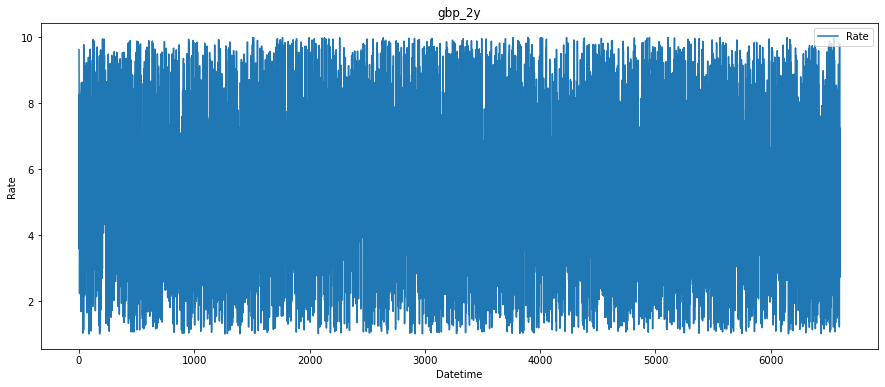

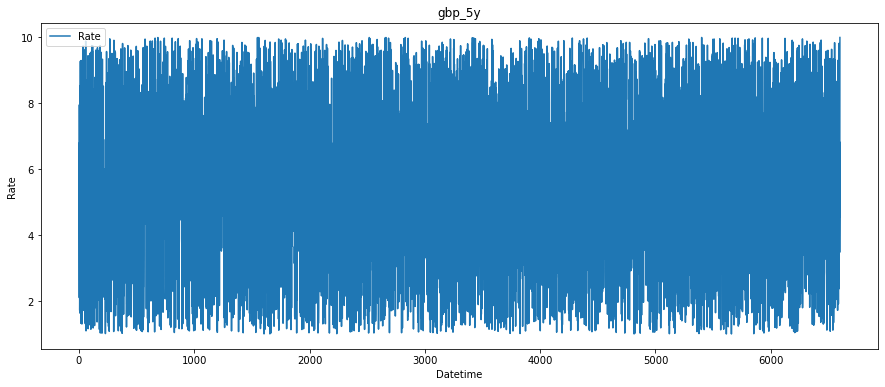

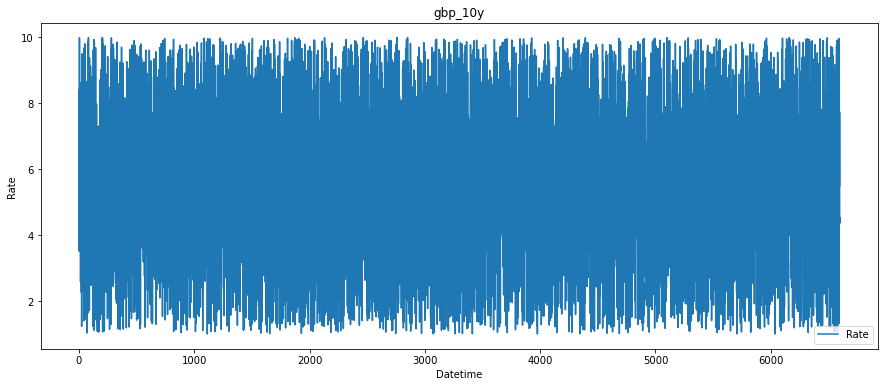

In [33]:
for tenor, df in result.items():
    df_plot_Rate = df[['datetime', 'Rate']].dropna()

    # Create a new figure for each tenor
    plt.figure(figsize=(15, 6))

    # Plot the RV values for the tenor
    sns.lineplot(data=df_plot_Rate)#x='datetime', y='value', hue='variable', 

    # Set the title and labels
    plt.title(f"{tenor}")
    plt.xlabel('Datetime')
    plt.ylabel('Rate')

    plt.show()

## Need to change the tick labest to the datetime

## Computing Intraday Realized Vols on different time windows

#### Defining the function to compute annualized vols and adding them to the dataframe

In [36]:
def annualised_RVs(data, window_minutes_list):
    for window_minutes in window_minutes_list:
        n_obs_per_minute = 2
        trading_days_per_year = 252
        trading_hours_per_day = 9
        window_periods = int(window_minutes*n_obs_per_minute)   ## How many observations do we have per window.
        periods_per_year = (60/window_minutes)*trading_hours_per_day*trading_days_per_year
        
        # Compute realized vols for each window minutes in window_minutes_list
        col_name = f'RV_{window_minutes}min'
        data[col_name] = ((((data['Rate'].diff())**2).rolling(window_periods).sum())**0.5)*(periods_per_year**0.5)        
        
    return data
### Problem in the formula? values are way too high

#### Applyig the function to the dataframe

In [37]:
# Defininf the window_minutes we want to apply
window_minutes_list = [5, 15, 30, 60, 120] 

#GBP_Curve: ['gbp_2y', 'gbp_5y', 'gbp_10y'] 
for tenor, df in result.items():
    df = annualised_RVs(df, window_minutes_list)
    df = df.dropna()
    display(df)
    


,datetime,ticker,Rate,RV_5min,RV_15min,RV_30min,RV_60min,RV_120min
240,2023-07-01 11:00:00,gbp_2y,8.654858,1402.477629,1315.553974,1790.186658,1871.053146,1818.344899
241,2023-07-01 11:00:30,gbp_2y,3.226032,1661.386267,1410.564201,1823.675329,1888.794572,1827.326956
242,2023-07-01 11:01:00,gbp_2y,2.849428,1627.940830,1298.279307,1815.325987,1881.841104,1818.735940
243,2023-07-01 11:01:30,gbp_2y,5.276635,1604.446257,1317.213156,1762.697182,1877.493569,1817.240660
244,2023-07-01 11:02:00,gbp_2y,4.459051,1459.371815,1313.485447,1761.806792,1874.346025,1816.827776
...,...,...,...,...,...,...,...,...
6596,2023-07-03 15:58:00,gbp_2y,3.950568,2040.034364,1911.577116,1885.945917,1936.908398,1878.247940
6597,2023-07-03 15:58:30,gbp_2y,9.824356,2254.628335,1982.896840,1925.809009,1934.458131,1886.112465
6598,2023-07-03 15:59:00,gbp_2y,2.719245,2528.152541,2050.829816,1971.449656,1942.738577,1901.208426
6599,2023-07-03 15:59:30,gbp_2y,7.248831,2517.668715,2083.791019,1979.973701,1948.713457,1907.269044


,datetime,ticker,Rate,RV_5min,RV_15min,RV_30min,RV_60min,RV_120min
240,2023-07-01 11:00:00,gbp_5y,6.912239,1683.306516,1591.094870,1649.212622,1747.298589,2026.632835
241,2023-07-01 11:00:30,gbp_5y,7.842899,1644.605248,1475.309493,1650.380061,1728.581400,2022.931755
242,2023-07-01 11:01:00,gbp_5y,1.706298,1929.918496,1534.983242,1701.292301,1739.500372,2031.634558
243,2023-07-01 11:01:30,gbp_5y,8.845528,2025.259780,1660.363643,1754.227255,1770.871075,2039.828747
244,2023-07-01 11:02:00,gbp_5y,4.359655,2144.597238,1691.929589,1719.843344,1754.908620,2039.274286
...,...,...,...,...,...,...,...,...
6596,2023-07-03 15:58:00,gbp_5y,4.547166,2342.620927,1934.832815,1907.179675,1821.666357,1932.802117
6597,2023-07-03 15:58:30,gbp_5y,6.830892,2237.295652,1863.435523,1900.680631,1824.795382,1923.435887
6598,2023-07-03 15:59:00,gbp_5y,3.478511,2041.623320,1862.119581,1909.297946,1831.660503,1921.754703
6599,2023-07-03 15:59:30,gbp_5y,5.166639,1844.273500,1849.674598,1858.573231,1818.899411,1919.382225


,datetime,ticker,Rate,RV_5min,RV_15min,RV_30min,RV_60min,RV_120min
240,2023-07-01 11:00:00,gbp_10y,8.887594,1368.051317,1705.098583,2096.563705,2134.707904,1952.259763
241,2023-07-01 11:00:30,gbp_10y,3.190433,1614.864507,1778.420217,2080.396773,2140.724383,1958.902151
242,2023-07-01 11:01:00,gbp_10y,6.339647,1693.599597,1800.947170,2032.955018,2142.560252,1954.788346
243,2023-07-01 11:01:30,gbp_10y,3.739971,1561.889728,1817.855623,2025.810958,2141.781484,1952.486000
244,2023-07-01 11:02:00,gbp_10y,7.347555,1647.591434,1848.190493,2040.328730,2111.088485,1954.226892
...,...,...,...,...,...,...,...,...
6596,2023-07-03 15:58:00,gbp_10y,5.483823,2091.253289,2422.952395,2276.314213,2134.209339,1991.482154
6597,2023-07-03 15:58:30,gbp_10y,7.732949,2101.566407,2430.830519,2279.504510,2131.132952,1986.543758
6598,2023-07-03 15:59:00,gbp_10y,4.384859,2050.438868,2405.866714,2279.040331,2127.576706,1989.275551
6599,2023-07-03 15:59:30,gbp_10y,4.532166,2050.557910,2353.976854,2241.353519,2122.900474,1986.388538


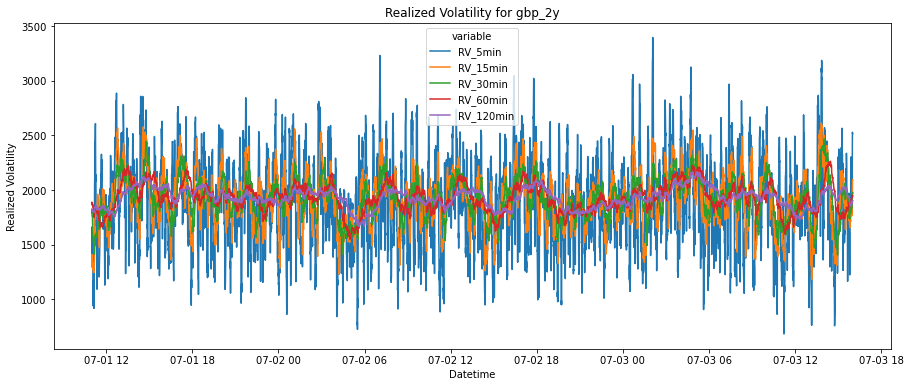

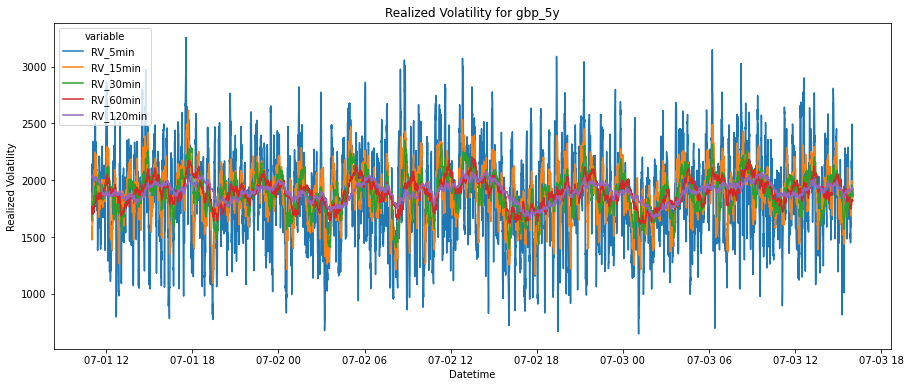

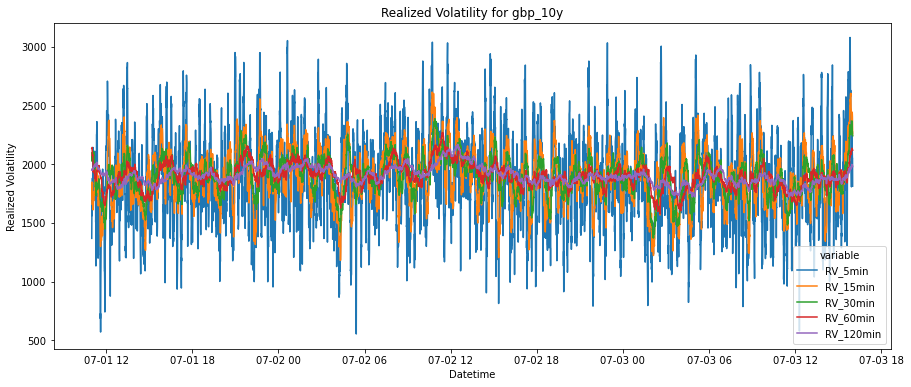

In [38]:
# Iterate over each security DataFrame in the result dictionary
for tenor, df in result.items():
    df_plot_RV = df[['datetime', 'RV_5min', 'RV_15min', 'RV_30min', 'RV_60min', 'RV_120min']].dropna()

    # Create a new figure for each tenor
    plt.figure(figsize=(15, 6))

    # Plot the RV values for the tenor
    sns.lineplot(x='datetime', y='value', hue='variable', data=pd.melt(df_plot_RV, ['datetime']))

    # Set the title and labels
    plt.title(f"Realized Volatility for {tenor}")
    plt.xlabel('Datetime')
    plt.ylabel('Realized Volatility')

    plt.show()

Need to isolate the last day and plot only for that day. 

Also, retreive the Implied Vol for the corresponding 1m expiry option (Closed to the outright swap rate).

Draw a horizontal line at the level of implied vol, to see if the IV is higher than RV. 

#### Isolate for 1 day

In [201]:
## Add a column with only the date
def dateTime_to_date(dateTime):
    date_string = str(dateTime.date())
    date = dt.date(int(date_string[:4]), int(date_string[5:7]), int(date_string[-2:]))
    return date

for tenor, df in result.items():
    df['date'] = df['datetime'].apply(lambda x: dateTime_to_date(x))
    
    # Swapping the position of the columns
    df=df[['datetime','date','ticker','Rate','RV_5min','RV_15min','RV_30min','RV_60min','RV_120min']]
    
    display(df)

,datetime,date,ticker,Rate,RV_5min,RV_15min,RV_30min,RV_60min,RV_120min
0,2023-07-01 09:00:00,2023-07-01,gbp_2y,9.629390,NaN,NaN,NaN,NaN,NaN
1,2023-07-01 09:00:30,2023-07-01,gbp_2y,8.857419,NaN,NaN,NaN,NaN,NaN
2,2023-07-01 09:01:00,2023-07-01,gbp_2y,3.588276,NaN,NaN,NaN,NaN,NaN
3,2023-07-01 09:01:30,2023-07-01,gbp_2y,6.857174,NaN,NaN,NaN,NaN,NaN
4,2023-07-01 09:02:00,2023-07-01,gbp_2y,8.268411,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6596,2023-07-03 15:58:00,2023-07-03,gbp_2y,3.950568,2040.034364,1911.577116,1885.945917,1936.908398,1878.247940
6597,2023-07-03 15:58:30,2023-07-03,gbp_2y,9.824356,2254.628335,1982.896840,1925.809009,1934.458131,1886.112465
6598,2023-07-03 15:59:00,2023-07-03,gbp_2y,2.719245,2528.152541,2050.829816,1971.449656,1942.738577,1901.208426
6599,2023-07-03 15:59:30,2023-07-03,gbp_2y,7.248831,2517.668715,2083.791019,1979.973701,1948.713457,1907.269044


,datetime,date,ticker,Rate,RV_5min,RV_15min,RV_30min,RV_60min,RV_120min
0,2023-07-01 09:00:00,2023-07-01,gbp_5y,7.937556,NaN,NaN,NaN,NaN,NaN
1,2023-07-01 09:00:30,2023-07-01,gbp_5y,4.184844,NaN,NaN,NaN,NaN,NaN
2,2023-07-01 09:01:00,2023-07-01,gbp_5y,6.742456,NaN,NaN,NaN,NaN,NaN
3,2023-07-01 09:01:30,2023-07-01,gbp_5y,2.100414,NaN,NaN,NaN,NaN,NaN
4,2023-07-01 09:02:00,2023-07-01,gbp_5y,6.803339,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6596,2023-07-03 15:58:00,2023-07-03,gbp_5y,4.547166,2342.620927,1934.832815,1907.179675,1821.666357,1932.802117
6597,2023-07-03 15:58:30,2023-07-03,gbp_5y,6.830892,2237.295652,1863.435523,1900.680631,1824.795382,1923.435887
6598,2023-07-03 15:59:00,2023-07-03,gbp_5y,3.478511,2041.623320,1862.119581,1909.297946,1831.660503,1921.754703
6599,2023-07-03 15:59:30,2023-07-03,gbp_5y,5.166639,1844.273500,1849.674598,1858.573231,1818.899411,1919.382225


,datetime,date,ticker,Rate,RV_5min,RV_15min,RV_30min,RV_60min,RV_120min
0,2023-07-01 09:00:00,2023-07-01,gbp_10y,5.331999,NaN,NaN,NaN,NaN,NaN
1,2023-07-01 09:00:30,2023-07-01,gbp_10y,8.421993,NaN,NaN,NaN,NaN,NaN
2,2023-07-01 09:01:00,2023-07-01,gbp_10y,3.511268,NaN,NaN,NaN,NaN,NaN
3,2023-07-01 09:01:30,2023-07-01,gbp_10y,7.344179,NaN,NaN,NaN,NaN,NaN
4,2023-07-01 09:02:00,2023-07-01,gbp_10y,9.993172,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6596,2023-07-03 15:58:00,2023-07-03,gbp_10y,5.483823,2091.253289,2422.952395,2276.314213,2134.209339,1991.482154
6597,2023-07-03 15:58:30,2023-07-03,gbp_10y,7.732949,2101.566407,2430.830519,2279.504510,2131.132952,1986.543758
6598,2023-07-03 15:59:00,2023-07-03,gbp_10y,4.384859,2050.438868,2405.866714,2279.040331,2127.576706,1989.275551
6599,2023-07-03 15:59:30,2023-07-03,gbp_10y,4.532166,2050.557910,2353.976854,2241.353519,2122.900474,1986.388538


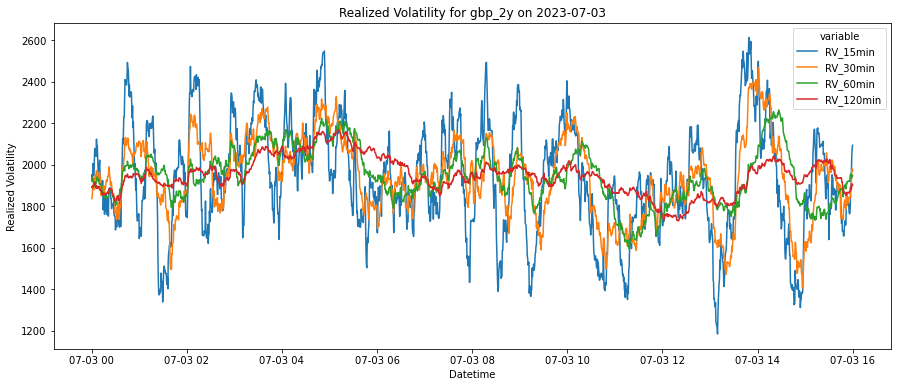

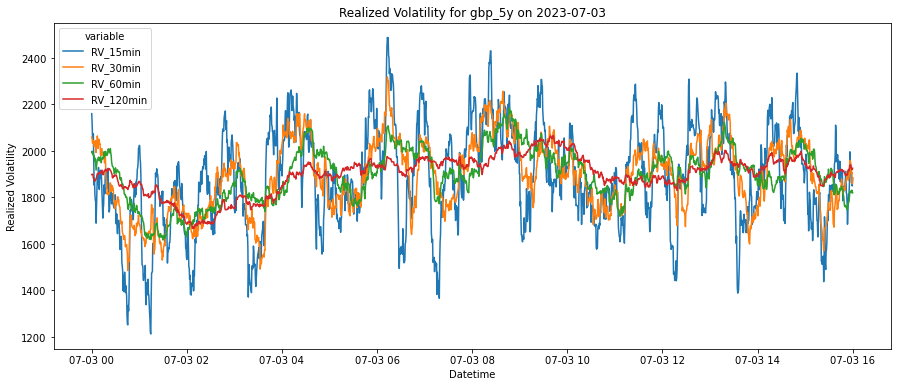

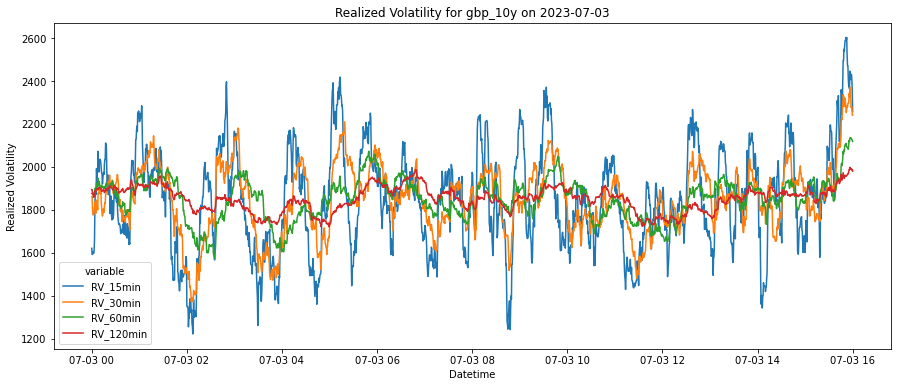

In [202]:
## Plot the RV graphs only for the last day
for tenor, df in result.items():
    days = list(set(df['datetime']))
    
    for day in [days[0]]: 
        df_plot_RV = df[['datetime', 'RV_15min', 'RV_30min', 'RV_60min', 'RV_120min']][df['date']==day].dropna()

        # Create a new figure for each tenor
        plt.figure(figsize=(15, 6))

        # Plot the RV values for the tenor
        sns.lineplot(x='datetime', y='value', hue='variable', data=pd.melt(df_plot_RV, ['datetime']))

        # Set the title and labels
        plt.title(f"Realized Volatility for {tenor} on {day.date()}")
        plt.xlabel('Datetime')
        plt.ylabel('Realized Volatility')
        #plt.xticks(df['datetime'], labels='datetime', rotation ='vertical')
        
        plt.show()

# Avg annualized vol on diff timeframes, per hour
Each hour, we compare the annualized vols for 5, 15, 30, 60 & 120 min

In [ ]:
# Get the data

for tenor, df in result.items():
    
    
    
    
    

In [ ]:
# Assuming the original dataframe is called 'df' containing the timeseries data

# Convert 'Datetime' column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Create a new column 'Hour' to extract the hour from the timestamp
df['Hour'] = df['Datetime'].dt.hour

# Define the hourly ranges
hourly_ranges = [
    (7, 30), (8, 30), (9, 30), (10, 30), (11, 30), (12, 30), (13, 30), (14, 30), (15, 30), (16, 30)
]

# Create an empty dataframe to store the grouped data
grouped_df = pd.DataFrame(columns=['Hour Range', 'Mean RV_1min', 'Mean RV_5min', 'Mean RV_15min', 'Mean RV_30min', 'Mean RV_60min'])

# Iterate over the hourly ranges
for i in range(len(hourly_ranges) - 1):
    start_hour, start_minute = hourly_ranges[i]
    end_hour, end_minute = hourly_ranges[i + 1]
    
    # Filter the rows within the hour range
    hour_range_df = df[(df['Hour'] >= start_hour) & (df['Hour'] < end_hour)]
    
    # Calculate the mean of the realized volatilities for each column
    mean_rv_1min = hour_range_df['RV_1min'].mean()
    mean_rv_5min = hour_range_df['RV_5min'].mean()
    mean_rv_15min = hour_range_df['RV_15min'].mean()
    mean_rv_30min = hour_range_df['RV_30min'].mean()
    mean_rv_60min = hour_range_df['RV_60min'].mean()
    
    # Add the row to the grouped dataframe
    grouped_df.loc[i] = [f'{start_hour}:{start_minute} - {end_hour}:{end_minute}', mean_rv_1min, mean_rv_5min, mean_rv_15min, mean_rv_30min, mean_rv_60min]

# Print the grouped dataframe
print(grouped_df)


In [ ]:
# Assuming your grouped dataframe is called 'grouped_df'

# Melt the dataframe to convert the RV columns into a single column
melted_df = grouped_df.melt(id_vars=['Hour Range'], var_name='RV Column', value_name='Mean RV')

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Hour Range', y='Mean RV', hue='RV Column', palette='viridis')

# Set the axis labels and plot title
plt.xlabel('Hour Range')
plt.ylabel('Mean RV')
plt.title('Mean RVs by Hour Range')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


# PART 2: Vol Grid

### Getting the Data

Need to structure the data with expiry column repeating the value for each tenor.


| Tenor | Expiry | Volatility |
| --- | --- | --- |
| 3M | 3M | Val |
| 6M | 3M | Val |
| 9M | 3M | Val |
| ... | ... | Val |
| 3M | 6M | Val |
| 6M | 6M | Val |
| 9M | 6M | Val |
| --- | --- | Val |


In [78]:
def get_implied_vol():
    #
    #
    #
    #
    #
    return implied_vol

Write the functionrp that allows me to get the IV for a specified expiry and tenor
### NEED to change `generate_random_number` by `get_implied_vol`

I need to get the implied vols for the same swaptions starting in 1m, and for the right tenor.
How is the data

In [84]:
def generate_random_number():
    return random.uniform(50, 150)


def create_implied_vol_dataframe(expiries, tenors):
    # Create an empty DataFrame with columns for Tenor, Expiry, and Implied_Vol
    df = pd.DataFrame(columns=['Tenor', 'Expiry', 'Implied_Vol'])

    # Iterate over each combination of expiries and tenors
    for expiry in expiries:
        for tenor in tenors:
            
            # Get the implied volatility for the current combination of expiry and tenor
            
            #implied_vol = generate_random_number()
            implied_vol = 100*round((0.025 + (expiries.index(expiry) + tenors.index(tenor)) * 0.003), 3)  # Randomly generated volatility values
          
            
            # Append the data to the DataFrame
            df = df.append({'Tenor': tenor, 'Expiry': expiry, 'Implied_Vol': implied_vol}, ignore_index=True)

    return df

Creating the heatmap dataframe

In [85]:
# Define the expiries and tenors
expiries = ['3M', '6M', '9M', '12M', '18M', '2Y', '3Y', '5Y', '10Y']
tenors = ['3M', '6M', '9M', '12M', '18M', '2Y', '3Y', '5Y', '10Y']

# Create the implied volatility DataFrame
implied_vol_df = create_implied_vol_dataframe(expiries, tenors)

implied_vol_df.head(100)

,Tenor,Expiry,Implied_Vol
0,3M,3M,2.5
1,6M,3M,2.8
2,9M,3M,3.1
3,12M,3M,3.4
4,18M,3M,3.7
...,...,...,...
76,18M,10Y,6.1
77,2Y,10Y,6.4
78,3Y,10Y,6.7
79,5Y,10Y,7.0


In [86]:
# Pivot the DataFrame to reshape it for the heatmap
heatmap_df = implied_vol_df.pivot(index='Expiry', columns='Tenor', values='Implied_Vol')
# Reindex the DataFrame to match the order of tenors and expiries
heatmap_df = heatmap_df.reindex(tenors, columns=expiries)
display(heatmap_df)

Tenor,3M,6M,9M,12M,18M,2Y,3Y,5Y,10Y
Expiry,,,,,,,,,
3M,2.5,2.8,3.1,3.4,3.7,4.0,4.3,4.6,4.9
6M,2.8,3.1,3.4,3.7,4.0,4.3,4.6,4.9,5.2
9M,3.1,3.4,3.7,4.0,4.3,4.6,4.9,5.2,5.5
12M,3.4,3.7,4.0,4.3,4.6,4.9,5.2,5.5,5.8
18M,3.7,4.0,4.3,4.6,4.9,5.2,5.5,5.8,6.1
2Y,4.0,4.3,4.6,4.9,5.2,5.5,5.8,6.1,6.4
3Y,4.3,4.6,4.9,5.2,5.5,5.8,6.1,6.4,6.7
5Y,4.6,4.9,5.2,5.5,5.8,6.1,6.4,6.7,7.0
10Y,4.9,5.2,5.5,5.8,6.1,6.4,6.7,7.0,7.3


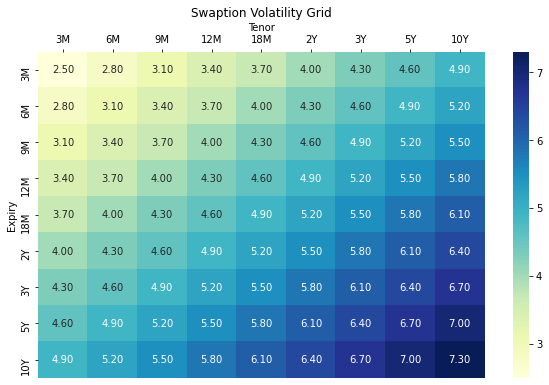

In [87]:
# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
ax = sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f")

# Move the x-axis tick marks to the top
ax.xaxis.tick_top()
# Move the x-axis label to the top
ax.xaxis.set_label_position('top')

# Set the axis labels and plot title
ax.set_xlabel("Tenor")
ax.set_ylabel("Expiry")
plt.title("Swaption Volatility Grid")

# Display the heatmap
plt.show()

### To plot IV vs RV, I would need to tompute the forward rates on every tick, and compute the RV

# PART 3: Optimal strategy for Gamma Hedging

1. End of day gamma hedging
2. Gamma hedging every friday
3. Gamma hedging every time the gamma position exceeds a certain value... which value ?
4. Gamma hedging everytime the 1h or 2h RV is higher than the implied vol

### Generating "plausible" data to work with

In [191]:
import pandas as pd
import numpy as np

# Define the assumptions
volatility = 0.2
interest_rate = 5
maturity = 2
notional = 1000000

# Define the start and end datetimes
start_datetime = pd.Timestamp('2023-01-01')
end_datetime = pd.Timestamp('2023-01-31')

# Generate timestamps at daily intervals
timestamps = pd.date_range(start=start_datetime, end=end_datetime, freq='D')

# Generate random interest rates centered around 5%
rates = np.random.normal(loc=5, scale=1, size=len(timestamps))
rates = np.maximum(rates, 0)  # Ensure rates are positive

# Compute the option values, delta, and gamma using the Black model
option_values = []
deltas = []
gammas = []
for rate in rates:
    # Compute option value using Black model
    d1 = (np.log(rate / interest_rate) + 0.5 * volatility**2 * maturity) / (volatility * np.sqrt(maturity))
    d2 = d1 - volatility * np.sqrt(maturity)
    option_value = (notional/100) * (rate * norm.cdf(d1) - interest_rate * norm.cdf(d2))
    option_values.append(option_value)

    # Compute delta and gamma in $ amounts
    delta = notional * norm.cdf(d1)/100
    deltas.append(delta)
    gamma = (notional * norm.pdf(d1) / (rate * volatility * np.sqrt(maturity)))/100
    gammas.append(gamma)

# Create the DataFrame
df_option = pd.DataFrame({
    'rate': rates,
    'OptionValue': option_values,
    'IR_delta': deltas,
    'IR_gamma': gammas
}, index=timestamps)

# Display the DataFrame
df_option.head()


,rate,OptionValue,IR_delta,IR_gamma
2023-01-01,5.066991,6001.993342,5747.484011,2734.646308
2023-01-02,5.515939,8843.149732,6874.464045,2269.346110
2023-01-03,3.437454,502.824509,1183.318246,2037.249859
2023-01-04,4.470947,3088.105996,3997.538588,3054.624172
2023-01-05,5.794265,10840.326107,7462.282292,1954.390162


### Creating the replicating portfolio

In [192]:
df_option.head(10)

,rate,OptionValue,IR_delta,IR_gamma
2023-01-01,5.066991,6001.993342,5747.484011,2734.646308
2023-01-02,5.515939,8843.149732,6874.464045,2269.346110
2023-01-03,3.437454,502.824509,1183.318246,2037.249859
2023-01-04,4.470947,3088.105996,3997.538588,3054.624172
2023-01-05,5.794265,10840.326107,7462.282292,1954.390162
2023-01-06,3.745711,973.153616,1895.014999,2557.251107
2023-01-07,5.293558,7372.544304,6342.508180,2512.178081
2023-01-08,3.643418,792.421944,1641.286021,2400.574470
2023-01-09,5.466430,8505.604194,6760.738991,2324.664611
2023-01-10,4.964359,5426.676839,5462.247554,2822.107223


### Defining a Function to delta hedga at a fixed interval

In [193]:
def fixed_interval(df, transac_cost, rehedge_interval):
    # Add the columns to the DataFrame
    df['Replicating_Portfolio_Value'] = 0.0
    df['Replicating_Error'] = 0.0
    df['Rehedging_Cost'] = 0.0
    df['Cumulative_Rehedging_Cost'] = 0.0

    # Compute the columns based on the specified rules
    for i in range(len(df)):
        if i == 0:
            # For the first observation, the value of the replicating portfolio is equal to the delta of the option
            df.at[df.index[i], 'Replicating_Portfolio_Value'] = df.at[df.index[i], 'IR_delta']

            # For the first observation, the replicating error is 0 because we buy exactly the right amount of underlying
            df.at[df.index[i], 'Replicating_Error'] = 0

            # For the first observation, the rehedging cost is 1bp times the value of the replicating portfolio
            df.at[df.index[i], 'Rehedging_Cost'] = df.at[df.index[i], 'Replicating_Portfolio_Value'] * transac_cost

            # For the first observation, the cumulative cost of rehedging is the initial cost of hedging
            df.at[df.index[i], 'Cumulative_Rehedging_Cost'] = df.at[df.index[i], 'Rehedging_Cost']

        else:
            # For subsequent observations, compute the value of the replicating portfolio using the previous value and the change in interest rate
            prev_portfolio_value = df.at[df.index[i - 1], 'Replicating_Portfolio_Value']
            rate_change = df.at[df.index[i], 'rate'] - df.at[df.index[i - 1], 'rate']
            df.at[df.index[i], 'Replicating_Portfolio_Value'] = prev_portfolio_value * (1 + rate_change/100)

            # Compute the replicating error (absolute difference between new option value and previous portfolio value)
            option_value_diff = df.at[df.index[i], 'IR_delta'] - df.at[df.index[i], 'Replicating_Portfolio_Value']
            df.at[df.index[i], 'Replicating_Error'] = abs(option_value_diff)

            # Rehedging logic: Rehedging occurs every rehedge_interval observations
            if i % rehedge_interval == 0:
                # Compute the cost of rehedging (1bp times the difference between new delta and previous portfolio value)
                delta_diff = df.at[df.index[i], 'IR_delta'] - df.at[df.index[i], 'Replicating_Portfolio_Value']
                df.at[df.index[i], 'Rehedging_Cost'] = transac_cost * abs(delta_diff)

                # Compute the cumulative rehedging cost
                cumulative_cost = df.at[df.index[i - 1], 'Cumulative_Rehedging_Cost'] + df.at[df.index[i], 'Rehedging_Cost']
                df.at[df.index[i], 'Cumulative_Rehedging_Cost'] = cumulative_cost
            else:
                # For non-rehedging observations, set the rehedging cost and cumulative rehedging cost to 0
                df.at[df.index[i], 'Rehedging_Cost'] = 0.0
                df.at[df.index[i], 'Cumulative_Rehedging_Cost'] = df.at[df.index[i - 1], 'Cumulative_Rehedging_Cost']
    
    return df

### Iterating with different intervals, and storing the dataframes in a dictionnary called dfs_fixed_interval
NEXT step is to run this code for the options corresponding to each tenor of each curve. And the compare implied vol to realized vol, and gamma hedge this way (one of the possible strategies)

ex: 1m10Y to approximate the 10Y swap rate... Since I don't have the forward rates to compare directly.

In [185]:
# List of intervals
fixed_intervals = [1, 2, 5, 10]

# Dictionary to store the resulting DataFrames
dfs_fixed_interval = {}

# Loop through the intervals
for interval in fixed_intervals:
    # Create a distinct DataFrame for each interval
    df_fixed_interval = fixed_interval(df_option.copy(), transac_cost=0.0001, rehedge_interval=interval)
    # Add the DataFrame to the dictionary with a custom name
    dfs_fixed_interval[f"df_fixed_interval_{interval}"] = df_fixed_interval


Displaying all the fixed_interval dataframes by iterating through dfs_fixed_interval

In [186]:
for df_fixed_interval, df in dfs_fixed_interval.items():
    print(f"Fixed time interval hedging. {df_fixed_interval}")
    display(df.head())
    print("\n")

Fixed time interval hedging. df_fixed_interval_1


,rate,OptionValue,IR_delta,IR_gamma,Replicating_Portfolio_Value,Replicating_Error,Rehedging_Cost,Cumulative_Rehedging_Cost
2023-01-01,5.556230,9121.957049,6964.985208,2224.005604,6964.985208,0.000000,0.696499,0.696499
2023-01-02,5.455888,8434.460458,6736.170142,2336.374068,6957.996386,221.826244,0.022183,0.718681
2023-01-03,7.165002,22462.254374,9212.312318,725.024221,7076.916517,2135.395801,0.213540,0.932221
2023-01-04,4.356482,2650.540590,3647.915477,3049.869177,6878.159860,3230.244383,0.323024,1.255245
2023-01-05,5.927840,11854.093286,7713.339329,1805.148552,6986.240400,727.098929,0.072710,1.327955




Fixed time interval hedging. df_fixed_interval_2


,rate,OptionValue,IR_delta,IR_gamma,Replicating_Portfolio_Value,Replicating_Error,Rehedging_Cost,Cumulative_Rehedging_Cost
2023-01-01,5.556230,9121.957049,6964.985208,2224.005604,6964.985208,0.000000,0.696499,0.696499
2023-01-02,5.455888,8434.460458,6736.170142,2336.374068,6957.996386,221.826244,0.000000,0.696499
2023-01-03,7.165002,22462.254374,9212.312318,725.024221,7076.916517,2135.395801,0.213540,0.910038
2023-01-04,4.356482,2650.540590,3647.915477,3049.869177,6878.159860,3230.244383,0.000000,0.910038
2023-01-05,5.927840,11854.093286,7713.339329,1805.148552,6986.240400,727.098929,0.072710,0.982748




Fixed time interval hedging. df_fixed_interval_5


,rate,OptionValue,IR_delta,IR_gamma,Replicating_Portfolio_Value,Replicating_Error,Rehedging_Cost,Cumulative_Rehedging_Cost
2023-01-01,5.556230,9121.957049,6964.985208,2224.005604,6964.985208,0.000000,0.696499,0.696499
2023-01-02,5.455888,8434.460458,6736.170142,2336.374068,6957.996386,221.826244,0.000000,0.696499
2023-01-03,7.165002,22462.254374,9212.312318,725.024221,7076.916517,2135.395801,0.000000,0.696499
2023-01-04,4.356482,2650.540590,3647.915477,3049.869177,6878.159860,3230.244383,0.000000,0.696499
2023-01-05,5.927840,11854.093286,7713.339329,1805.148552,6986.240400,727.098929,0.000000,0.696499




Fixed time interval hedging. df_fixed_interval_10


,rate,OptionValue,IR_delta,IR_gamma,Replicating_Portfolio_Value,Replicating_Error,Rehedging_Cost,Cumulative_Rehedging_Cost
2023-01-01,5.556230,9121.957049,6964.985208,2224.005604,6964.985208,0.000000,0.696499,0.696499
2023-01-02,5.455888,8434.460458,6736.170142,2336.374068,6957.996386,221.826244,0.000000,0.696499
2023-01-03,7.165002,22462.254374,9212.312318,725.024221,7076.916517,2135.395801,0.000000,0.696499
2023-01-04,4.356482,2650.540590,3647.915477,3049.869177,6878.159860,3230.244383,0.000000,0.696499
2023-01-05,5.927840,11854.093286,7713.339329,1805.148552,6986.240400,727.098929,0.000000,0.696499
